In [31]:
#butterfly

import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from random import random

def payoff_butterfly(s,K):
  
    
    if s <= K:
        return 0
    if K< s <= 2*K:
        return s-K
    if 2*K< s < 3*K:
        return 3*K-s
    if s>=3*K:
        return 0

def  Prix_butterfly_Stfixe_tfixe(t,St,sigma,r,T,Nmc,K):
    gain = np.zeros((Nmc))
    for n in range(Nmc):
        g= np.random.randn() 
        ST= St*np.exp((r-sigma**2/2)*(T-t)+ sigma*np.sqrt(T-t)*g)
        gain[n]= payoff_butterfly(ST,K)
        
    prix=np.exp(-r*(T-t))*np.mean(gain)
    
    return prix

def Surface_butterfly():
    
    Nmc=1000
    L=80
    K=10
    T=0.5
    r=0.1
    sigma=0.5
    Nt=10
    Ns=40
    N= 99
    M= 4999
    
    S=np.linspace(0,L,N+2)
    t1=np.linspace(0,T,M+2)
    V=np.zeros((M+2,N+2))
    dt=T/(M+2)
    ds =L/(N+2)
    
    St=np.linspace(0,L,Ns)
    t=np.linspace(0,T,Nt)
    
    prix_surface = np.zeros((Nt,Ns))
    V=np.zeros((M+2,N+2))
    
    for j in range(Ns):
        for m in range(Nt):
            
            prix_surface[m][j]= Prix_butterfly_Stfixe_tfixe(t[m],St[j],sigma,r,T,Nmc,K)
    
    
    for i in range(N+2):
        V[M+1][i]=  payoff_butterfly(S[i],K)
    
   

    for n in range(M+1,0,-1):
        for i in range(0,N+1):
            V[n-1][i]=V[n][i]+dt*(r*S[i]*(V[n][i+1]-V[n][i-1])/(2*ds)+1/2*sigma**2*S[i]**2*(V[n][i+1]+V[n][i-1]-2*V[n][i])/(ds*ds)-r*V[n][i])

    
    
   
    plt.plot(St, prix_surface[0])
    
    plt.plot(S,V[0])
    plt.plot(S,  V[M+1] )
    plt.legend(('methode MC','méthode Df'))
    
    plt.show()
    


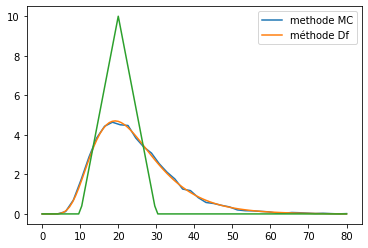

In [32]:
Surface_butterfly()